In [1]:
import numpy as np
import random
import pandas as pd
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings("ignore")

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.132122,-0.018322,2.338350,-3.031607,-2.359963,1
1,-1.999317,-0.856640,0.987615,-1.137022,-0.560017,0
2,-3.262435,-1.029538,1.573806,-1.222156,-0.277970,0
3,-2.576848,-0.081760,1.276897,-2.428320,-0.239061,0
4,0.638014,2.350622,-3.356529,0.546222,0.506582,1


In [ ]:
# Function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [ ]:
# Function for feature sampling

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [ ]:
# Function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)

In [8]:
df2 = combined_sampling(df,0.5,0.5)

In [9]:
df3 = combined_sampling(df,0.5,0.5)

In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col4', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')
Index(['col4', 'col3', 'target'], dtype='object')


In [11]:
df3

,col4,col3,target
17,-0.022244,3.198303,1
61,3.312874,4.459929,1
81,1.293487,2.788622,1
87,-1.305580,-0.166442,0
76,-0.666277,1.175450,0
12,0.470029,4.814379,1
58,-1.683409,0.490668,0
62,-2.132151,-0.260770,1
66,0.956865,-1.156679,0
9,-1.840713,-0.345311,1


## Model Building :

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree

[Text(0.5769230769230769, 0.9166666666666666, 'x[1] <= -1.514\ngini = 0.471\nsamples = 50\nvalue = [19, 31]'),
 Text(0.3076923076923077, 0.75, 'x[1] <= -2.415\ngini = 0.461\nsamples = 25\nvalue = [16, 9]'),
 Text(0.4423076923076923, 0.8333333333333333, 'True  '),
 Text(0.15384615384615385, 0.5833333333333334, 'x[0] <= -1.901\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.23076923076923078, 0.4166666666666667, 'x[1] <= -3.244\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.15384615384615385, 0.25, 'x[0] <= -1.237\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.46153846153846156, 0.5833333333333334, 'x[0] <= -0.326\ngini = 0.

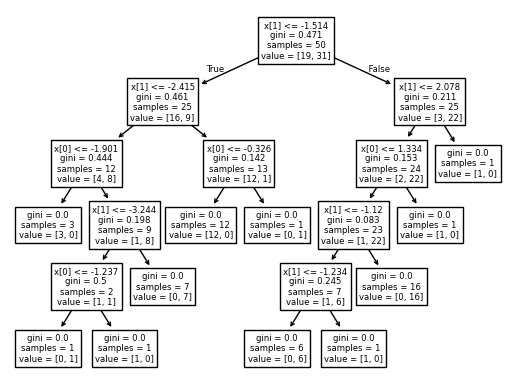

In [15]:
plot_tree(clf1)

[Text(0.4, 0.9444444444444444, 'x[1] <= -1.234\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.3, 0.8333333333333334, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.35, 0.8888888888888888, 'True  '),
 Text(0.5, 0.8333333333333334, 'x[0] <= -1.486\ngini = 0.404\nsamples = 32\nvalue = [23, 9]'),
 Text(0.45, 0.8888888888888888, '  False'),
 Text(0.3, 0.7222222222222222, 'x[0] <= -2.814\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.2, 0.6111111111111112, 'x[0] <= -3.829\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.6111111111111112, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.7, 0.7222222222222222, 'x[1] <= 1.706\ngini = 0.494\nsamples = 18\nvalue = [10, 8]'),
 Text(0.6, 0.6111111111111112, 'x[0] <= -0.91\ngini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7, 0.5,

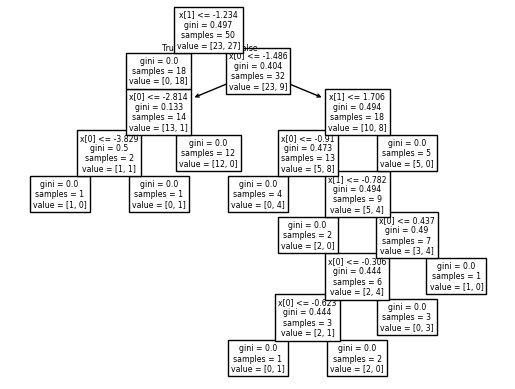

In [16]:
plot_tree(clf2)

[Text(0.6029411764705882, 0.9285714285714286, 'x[1] <= 1.661\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.3235294117647059, 0.7857142857142857, 'x[1] <= -0.214\ngini = 0.457\nsamples = 34\nvalue = [22, 12]'),
 Text(0.4632352941176471, 0.8571428571428572, 'True  '),
 Text(0.11764705882352941, 0.6428571428571429, 'x[0] <= 0.752\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.058823529411764705, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.17647058823529413, 0.5, 'x[0] <= 1.674\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.11764705882352941, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23529411764705882, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5294117647058824, 0.6428571428571429, 'x[0] <= -0.904\ngini = 0.375\nsamples = 28\nvalue = [21, 7]'),
 Text(0.4117647058823529, 0.5, 'x[0] <= -1.536\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.35294117647058826, 0.35714285714285715, 'gini = 0.0

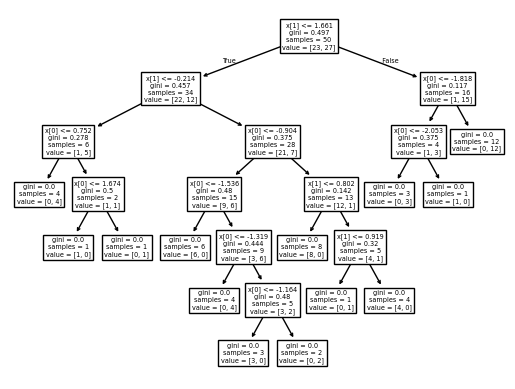

In [17]:
plot_tree(clf3)

## Prediction :

In [18]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([1])

In [19]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([1])

In [20]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

array([1])

In [21]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
98,-0.033052,1.745339,-0.179484,-1.602959,-0.091267,1
51,1.001931,-3.878417,-1.088799,2.065413,-2.472143,0
5,0.209317,1.800103,1.960269,-1.837801,3.918842,0
89,-1.360848,1.017488,2.294949,0.872951,-1.480605,1
30,-2.212590,0.130686,3.079686,0.429060,-2.317816,1
23,-4.566060,0.341899,2.060379,-2.728086,-0.781752,0
75,-0.973165,1.701823,1.760035,-3.485365,2.834919,0
66,-0.017164,-4.270663,-1.156679,0.956865,-3.005272,0
23,-4.566060,0.341899,2.060379,-2.728086,-0.781752,0
54,0.879535,0.850697,1.778346,-1.486459,-1.683321,1
